In [373]:
####################################################################
### lOADING LIBRARIES AND IMPORTING NECESSARY MODULES AND MODELS ###
####################################################################
# OS
import os

# data processing
import pandas as pd

# linear algebra
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [315]:
########################
### READING THE DATA ###
########################
# Check if New path exists
if os.path.exists("/Users/saiffallah.GREENTNS/Desktop/Formation\AI\GOMYCODE\Dataset") :
    # Change the current working Directory    
    os.chdir("/Users/saiffallah.GREENTNS/Desktop/Formation\AI\GOMYCODE\Dataset")
else:
    print("Can't change the Current Working Directory")    
titanic_df = pd.read_csv("titanic.csv",sep=',')

In [316]:
###########################################
### VIEWING A PART OF TITANIC DATAFRAME ###
###########################################
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [317]:
##############################################
### FINDING THE SHAPE OF TITANIC DATAFRAME ###
##############################################
titanic_df.shape

(891, 12)

In [318]:
############################################
### CHECK FOR NULLS IN TITANIC DATAFRAME ###
############################################
titanic_df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Preprocessing

In [319]:
# drop the cabin column since there's too much missing information.
titanic_df.drop('Cabin',axis=1,inplace=True)

In [320]:
# Generate descriptive statistic in order to know the most common one
titanic_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [321]:
# we will fill the 2 missing Embarked values with the most common one.
titanic_df['Embarked'].fillna('S',inplace=True)

In [322]:
################################################################
### Replace the missing values of the column "Age" with Mean ###
################################################################
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)

In [323]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Converting Feature 

In [324]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [325]:
# Convert ‘Sex’ feature into numeric.
one_hot=pd.get_dummies(titanic_df['Sex'])
titanic_df = titanic_df.join(one_hot)
titanic_df = titanic_df.drop(['Sex'],axis=1)

In [326]:
# Convert ‘Embarked’ feature into numeric.
one_hot=pd.get_dummies(titanic_df['Embarked'])
titanic_df = titanic_df.join(one_hot)
titanic_df = titanic_df.drop(['Embarked'],axis=1)

In [327]:
# Extract Title From Name
titanic_df['Title'] = titanic_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

Title_Dictionary = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

titanic_df['Title']= titanic_df['Title'].map(Title_Dictionary)
titanic_df = titanic_df.drop(['Name'],axis=1)

In [328]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
female         0
male           0
C              0
Q              0
S              0
Title          1
dtype: int64

In [329]:
titanic_df['Title'].value_counts()

1.0    517
2.0    185
3.0    126
4.0     40
5.0     22
Name: Title, dtype: int64

In [330]:
# we will fill the missing Title value with the most common one.
titanic_df['Title'].fillna(1,inplace=True)

# Creating New Features & Categories

In [331]:
# New Feature "Family_Size"
titanic_df['Family_Size']=titanic_df['SibSp']+titanic_df['Parch']+1
# Create category to feature "Family_Size"
titanic_df['Family_Size']=titanic_df['Family_Size'].map(lambda s: 1 if s == 1 else 2 if s == 2 else 3 if 3<=s<=4 else 4 if s>=5 else 0)

In [332]:
# New Feature "Not_Alone"
titanic_df['Not_Alone']=(titanic_df['SibSp']+titanic_df['Parch']).map(lambda s: 1 if s == 0 else 0 )

In [333]:
# Create category to feature "Age"
titanic_df['Age']=titanic_df['Age'].map(lambda s: 0 if s <= 11 else 1 if 11<s<=18 else 2 if 18<s<=22 else 3 if 22<s<=27 else 4 if 27<s<=33 else 5 if 33<s<=40 else 6)

In [334]:
titanic_df['Age'].value_counts()

4    303
6    150
3    106
5    101
2     92
1     71
0     68
Name: Age, dtype: int64

# remove some columns that we are not going to use

In [335]:
titanic_df = titanic_df.drop(['PassengerId','Ticket','Fare'],axis=1)

In [306]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,female,male,C,Q,S,Family_Size,Not_Alone
0,0,3,2,1,0,0,1,0,0,1,2,0
1,1,1,5,1,0,1,0,1,0,0,2,0
2,1,3,3,0,0,1,0,0,0,1,1,1
3,1,1,5,1,0,1,0,0,0,1,2,0
4,0,3,5,0,0,0,1,0,0,1,1,1


In [336]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
female         891 non-null uint8
male           891 non-null uint8
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
Title          891 non-null float64
Family_Size    891 non-null int64
Not_Alone      891 non-null int64
dtypes: float64(1), int64(7), uint8(5)
memory usage: 60.1 KB


# Building Machine Learning Models

In [337]:
# Split dataset in features and target variable
x = titanic_df.drop("Survived",axis=1)
y = titanic_df['Survived'].values
#
# Split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [338]:
# create a Logistic Regression classifier object using LogisticRegression() function
logreg=LogisticRegression()

In [339]:
# fit the model on the train set
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [340]:
# Perform prediction on the test set
y_pred = logreg.predict(X_test)
print("Accuracy={:.2f}".format(logreg.score(X_test,y_test)))

Accuracy=0.77


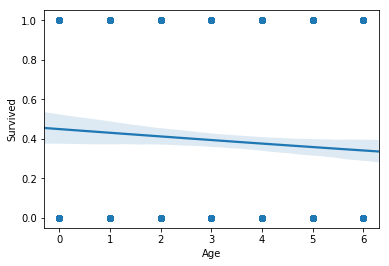

In [370]:
# Logistic Regression Distribution
sns.regplot(x='Age',y='Survived',data=titanic_df,logistic=True)

# Confusion Matrix

In [372]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[89, 19],
       [22, 49]], dtype=int64)

In [378]:
# Confusion Matrix
confusion_matrix=pd.crosstab(y_test,y_pred, rownames=['Actual'])
print(confusion_matrix)

col_0    0   1
Actual        
0       89  19
1       22  49


Text(0.5, 15.0, 'Predicted label')

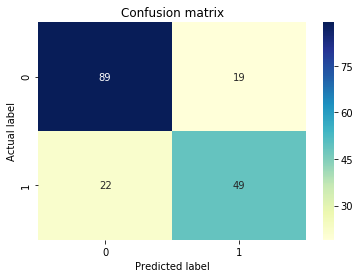

In [385]:
# Visualizing Confusion Matrix using Heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# as Survival (0 = No; 1 = Yes)
# TP =  89 and FP = 19
# FN = 22 and TN = 49

# Classification Report & Model Evaluation

In [374]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       108
           1       0.72      0.69      0.71        71

   micro avg       0.77      0.77      0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [381]:
# Model Evaluation using Confusion Matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.770949720670391
Precision: 0.7205882352941176
Recall: 0.6901408450704225


In [ ]:
# We got a classification rate of 77% that we can consider it as good
# A rate of 72% that our model can get right a passenger who will be survived
# 69% can be identified

# ROC Curve

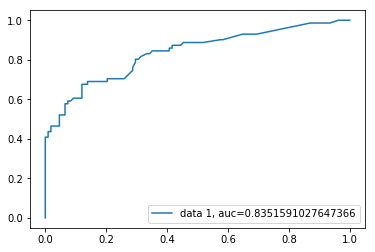

In [380]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# AUC score is 0.83.